<a href="https://colab.research.google.com/github/apaarrao/didactic-barnacle/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install scikit-learn pandas

In [37]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [38]:
df.columns


Index(['article', 'label', 'topic'], dtype='object')

In [39]:
X_text = df['article']
y_labels = df['label']

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(X_text)

# Label encode class labels
encoder = LabelEncoder()
y = encoder.fit_transform(y_labels)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [41]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [42]:
sample = ["The actor won an award for his performance in the latest thriller."]
sample_vec = vectorizer.transform(sample)
predicted = model.predict(sample_vec)
print("Predicted Category:", encoder.inverse_transform(predicted)[0])

Predicted Category: 2


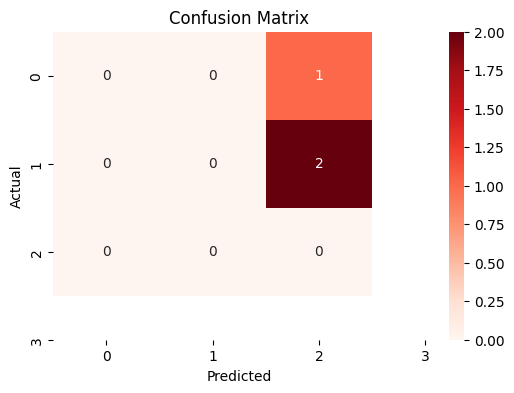

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
samples = [
    "The team won the final match after a dramatic penalty shootout.",
    "The government passed a new bill regulating online content.",
    "New AI models are capable of writing poetry.",
    "The actor received praise for her role in the new thriller."
]

sample_vecs = vectorizer.transform(samples)
predictions = model.predict(sample_vecs)
predicted_labels = encoder.inverse_transform(predictions)

for text, label in zip(samples, predicted_labels):
    print(f"→ {label}: {text}")


→ 2: The team won the final match after a dramatic penalty shootout.
→ 2: The government passed a new bill regulating online content.
→ 2: New AI models are capable of writing poetry.
→ 2: The actor received praise for her role in the new thriller.


In [45]:
import numpy as np

print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))
print("Classes in encoder:", encoder.classes_)

Unique values in y_test: [0 1]
Unique values in y_pred: [2]
Classes in encoder: [0 1 2 3]
